## CSE 546 Midterm Notebook

## Problem 1

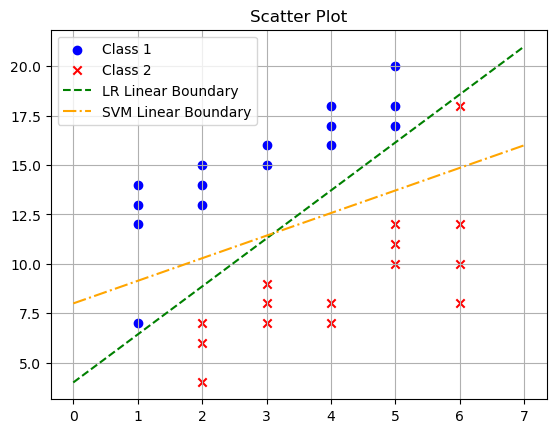

In [66]:
import matplotlib.pyplot as plt

class1_x = [1, 2, 1, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
class1_y = [13, 15, 7, 18, 20, 12, 14, 15, 16, 17, 14, 13, 16, 17, 18]

class2_x = [2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 6, 5, 6]
class2_y = [6, 8, 7, 10, 12, 4, 7, 8, 12, 8, 7, 9, 18, 11, 10]

plt.scatter(class1_x, class1_y, label='Class 1', color='blue', marker='o')
plt.scatter(class2_x, class2_y, label='Class 2', color='red', marker='x')

line1_x = [0, 7]  
line1_y = [4, 21]  
line2_x = [0, 7]  
line2_y = [8, 16]  

plt.plot(line1_x, line1_y, label='LR Linear Boundary', color='green', linestyle='--')
plt.plot(line2_x, line2_y, label='SVM Linear Boundary', color='orange', linestyle='-.')


plt.title('Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()



## Problem 2

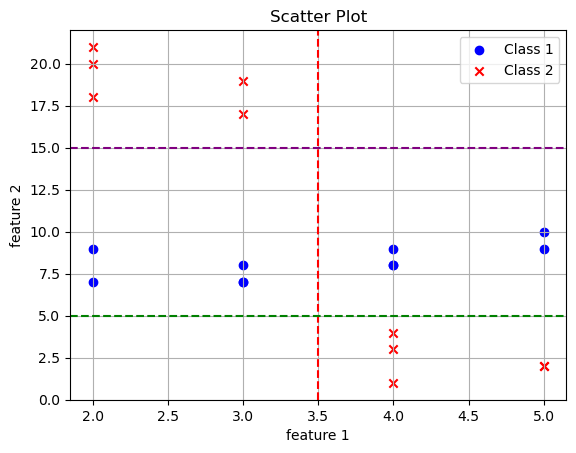

In [67]:
import matplotlib.pyplot as plt

class1_x = [2, 3, 4, 5, 3, 4, 2, 3, 4, 5]
class1_y = [7, 8, 9, 10, 7, 8, 9, 7, 8, 9]

class2_x = [2, 3, 2, 3, 2, 4, 5, 4, 5, 4]
class2_y = [18, 19, 20, 17, 21, 1, 2, 3, 2, 4]

plt.scatter(class1_x, class1_y, label='Class 1', color='blue', marker='o')
plt.scatter(class2_x, class2_y, label='Class 2', color='red', marker='x')

plt.axvline(x=3.5, color='red', linestyle='--')

plt.axhline(y=5, color='green', linestyle='--')

plt.axhline(y=15, color='purple', linestyle='--')

plt.title('Scatter Plot')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

## Problem 5

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)
print(X_train)


       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
18207  3.4028      27.0  3.706207   1.059310      1362.0  1.878621     37.37   
7576   2.1782      29.0  5.326146   1.196765      1254.0  3.380054     33.88   
5672   4.7216      41.0  5.796791   0.954545      1171.0  3.131016     33.69   
2818   2.0331      37.0  4.824658   1.213699       911.0  2.495890     35.41   
317    1.4097      37.0  4.017991   1.103448      1925.0  2.886057     37.76   
...       ...       ...       ...        ...         ...       ...       ...   
14064  2.1394      15.0  4.134675   1.120743      1800.0  2.786378     32.75   
18268  6.8268      34.0  6.797665   0.972763       662.0  2.575875     37.36   
4412   2.1108      44.0  3.810160   1.171123      1121.0  2.997326     34.08   
13779  2.5980      21.0  5.045603   1.052117      1351.0  2.200326     34.02   
20533  4.2432      13.0  6.350569   1.053775      2553.0  2.640124     38.54   

       Longitude  
18207    -122.05  
7

## (A) Ridge Regression Model

[0.5960861320381428, 0.5960861341712684, 0.5960861555023399, 0.5960863687944071, 0.596088499851329, 0.596109624943097, 0.5963031887447806, 0.5970681029698233, 0.5890530367400697, 0.5263686657569457]


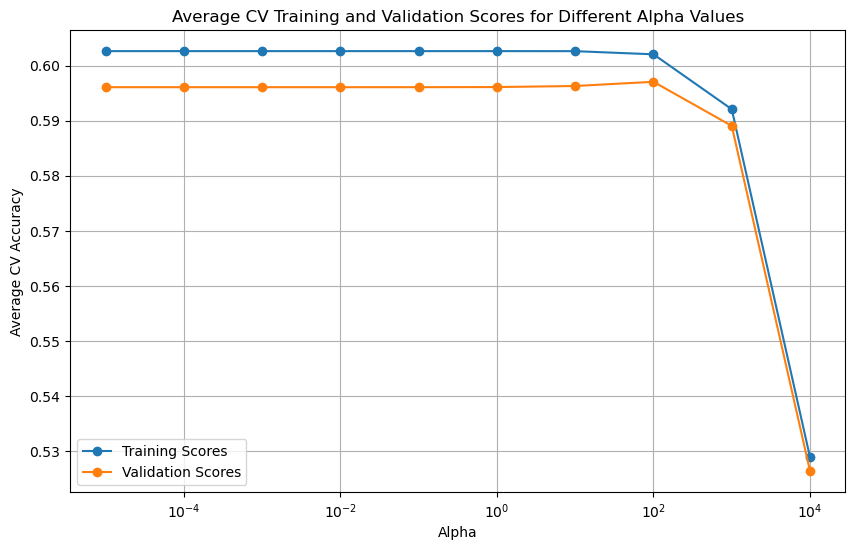

In [76]:
#no data normalization

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split


cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha

alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for alpha in alpha_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)
        fold_training_scores.append(ridge.score(X_train, y_train))
        fold_validation_scores.append(ridge.score(X_test, y_test))
    
    # Calculate and store the mean score for alpha
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(alpha_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()

[0.5960861318918326, 0.596086132708162, 0.5960861408713224, 0.5960862224894579, 0.5960870373243903, 0.5960950513381896, 0.5961620588556626, 0.5957710321820566, 0.5678268493473118, 0.40819875022974617]


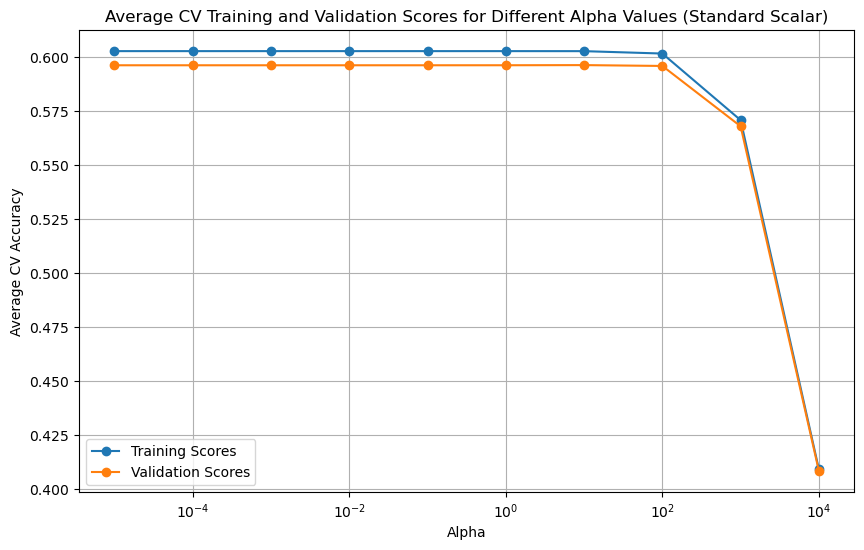

In [75]:
#Standard Scalar Normalization

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha

alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for alpha in alpha_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        # use standard scalar
        scaler_standard = StandardScaler()
        X_train_standard = scaler_standard.fit_transform(X_train)
        X_test_standard = scaler_standard.transform(X_test)
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_standard, y_train)
        fold_training_scores.append(ridge.score(X_train_standard, y_train))
        fold_validation_scores.append(ridge.score(X_test_standard, y_test))
    
    # Calculate and store the mean score for alpha
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(alpha_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different Alpha Values (Standard Scalar)')
plt.legend()
plt.grid(True)
plt.show()


[0.5960863787995472, 0.5960885988440159, 0.5961105103685447, 0.5963028581331655, 0.596804224102138, 0.5941062497184998, 0.5862608221285446, 0.4966571070348863, 0.1678469403032444, 0.021738793774243648]


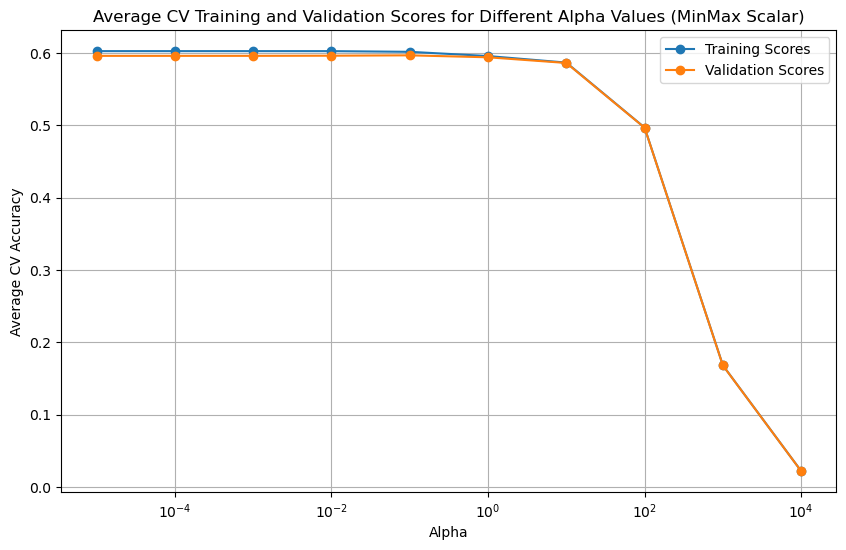

In [74]:
#MinMax Scalar Normalization

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha

alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for alpha in alpha_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        # use MinMaxScaler
        scaler_minmax = MinMaxScaler()
        X_train_minmax = scaler_minmax.fit_transform(X_train)
        X_test_minmax = scaler_minmax.transform(X_test)
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train_minmax, y_train)
        fold_training_scores.append(ridge.score(X_train_minmax, y_train))
        fold_validation_scores.append(ridge.score(X_test_minmax, y_test))
    
    # Calculate and store the mean score for alpha
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))

print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(alpha_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different Alpha Values (MinMax Scalar)')
plt.legend()
plt.grid(True)
plt.show()


## (B) Decision Tree

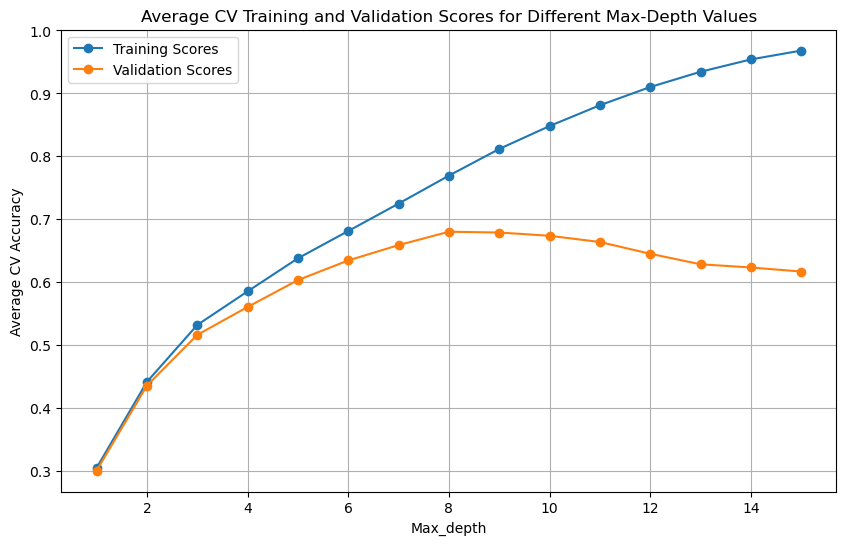

In [7]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha

max_depth_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,None]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for depth in max_depth_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        decision_tree = DecisionTreeRegressor(max_depth=depth)
        decision_tree.fit(X_train, y_train)
        fold_training_scores.append(decision_tree.score(X_train, y_train))
        fold_validation_scores.append(decision_tree.score(X_test, y_test))
    
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(max_depth_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('Max_depth')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different Max-Depth Values')
plt.legend()
plt.grid(True)
plt.show()

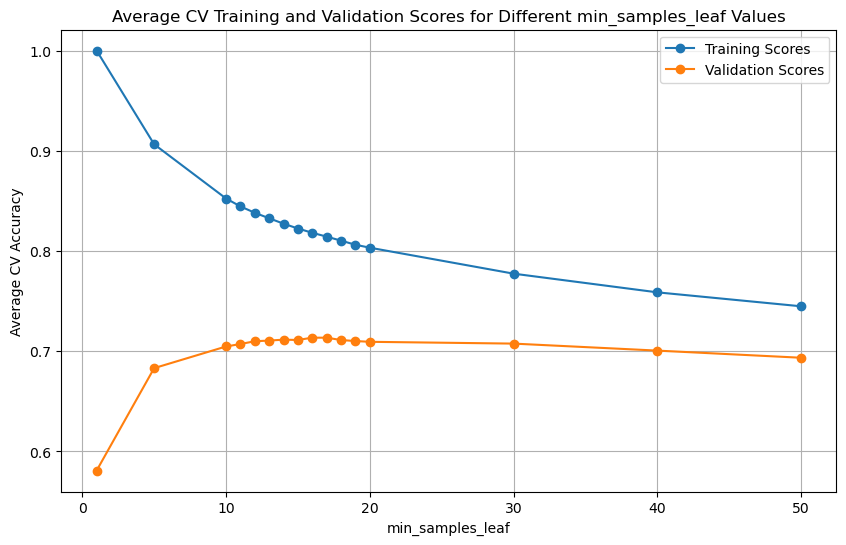

In [11]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha

min_samples_leaf_values = [1, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for min_samples_leaf in min_samples_leaf_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        decision_tree = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
        decision_tree.fit(X_train, y_train)
        fold_training_scores.append(decision_tree.score(X_train, y_train))
        fold_validation_scores.append(decision_tree.score(X_test, y_test))
    
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(min_samples_leaf_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different min_samples_leaf Values')
plt.legend()
plt.grid(True)
plt.show()

[[3.242]
 [1.268]
 [3.119]
 ...
 [2.   ]
 [1.067]
 [3.265]]


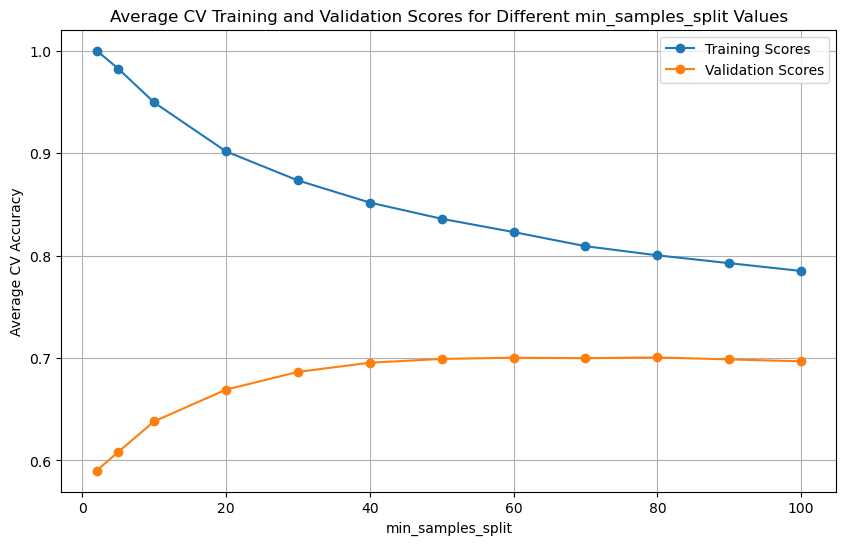

In [20]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X = X_train.values

y = y_train.values.ravel()

print(y)

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha

min_samples_split_values = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for min_samples_split in min_samples_split_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        decision_tree = DecisionTreeRegressor(min_samples_split=min_samples_split)
        decision_tree.fit(X_train, y_train)
        fold_training_scores.append(decision_tree.score(X_train, y_train))
        fold_validation_scores.append(decision_tree.score(X_test, y_test))
    
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(min_samples_split_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different min_samples_split Values')
plt.legend()
plt.grid(True)
plt.show()

## (C) Random Forest

[[   3.4028       27.            3.7062069  ...    1.87862069
    37.37       -122.05      ]
 [   2.1782       29.            5.32614555 ...    3.38005391
    33.88       -118.21      ]
 [   4.7216       41.            5.79679144 ...    3.13101604
    33.69       -118.33      ]
 ...
 [   2.1108       44.            3.81016043 ...    2.9973262
    34.08       -118.25      ]
 [   2.598        21.            5.04560261 ...    2.20032573
    34.02       -117.05      ]
 [   4.2432       13.            6.35056877 ...    2.6401241
    38.54       -121.67      ]]
[3.242 1.268 3.119 ... 2.    1.067 3.265]


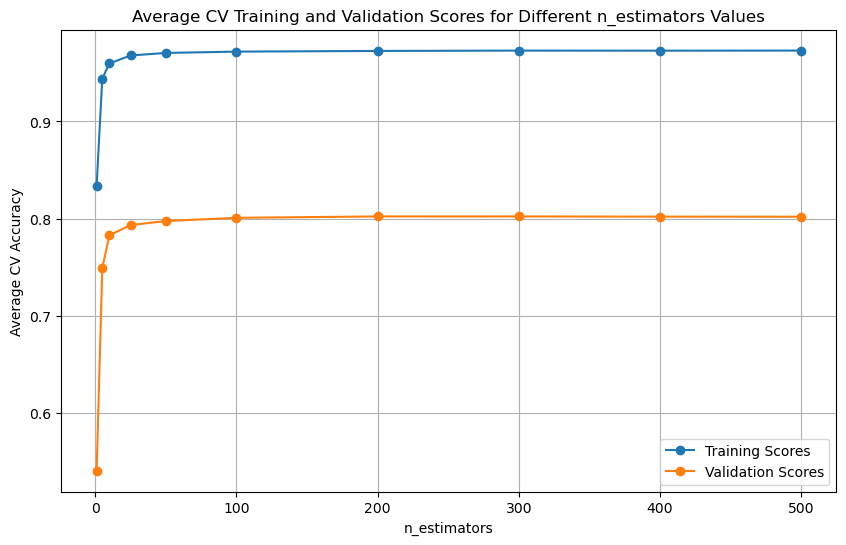

In [22]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha

n_estimators_values = [1, 5, 10, 25, 50, 100, 200, 300, 400, 500]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for n_estimators in n_estimators_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store training scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        rf_regressor = RandomForestRegressor(n_estimators=n_estimators)
        rf_regressor.fit(X_train, y_train)
        fold_training_scores.append(rf_regressor.score(X_train, y_train))
        fold_validation_scores.append(rf_regressor.score(X_test, y_test))
    
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(n_estimators_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different n_estimators Values')
plt.legend()
plt.grid(True)
plt.show()

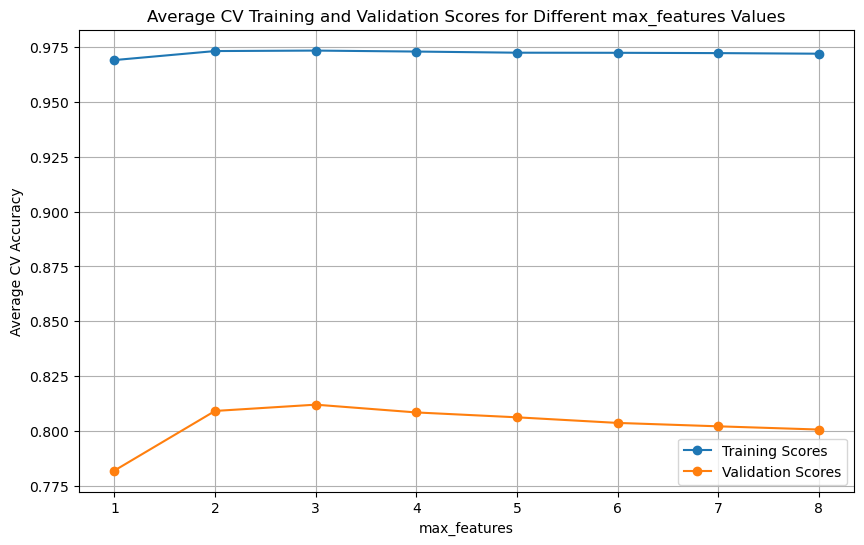

In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha


max_features_values = [1, 2, 3, 4, 5, 6, 7, 8]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for max_features in max_features_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store training scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        rf_regressor = RandomForestRegressor(max_features=max_features)
        rf_regressor.fit(X_train, y_train)
        fold_training_scores.append(rf_regressor.score(X_train, y_train))
        fold_validation_scores.append(rf_regressor.score(X_test, y_test))
    
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(max_features_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('max_features')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different max_features Values')
plt.legend()
plt.grid(True)
plt.show()

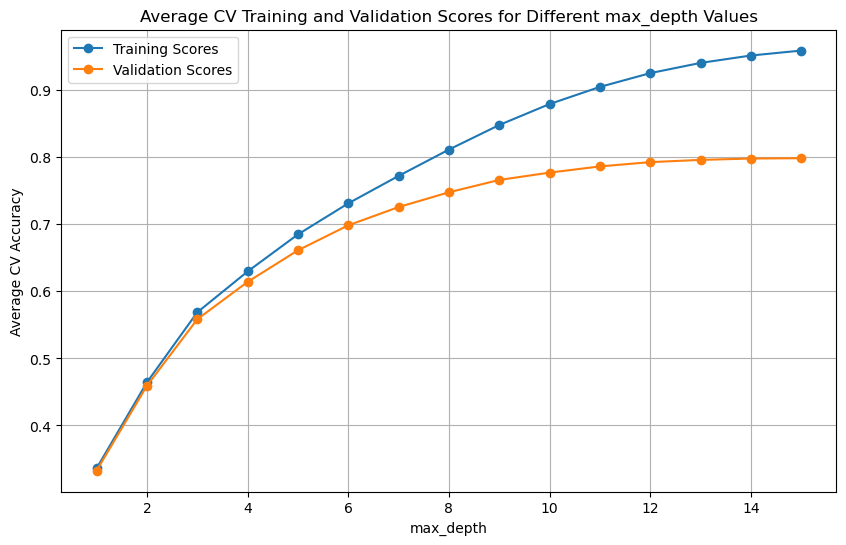

In [27]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha


max_depth_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,None]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for max_depth in max_depth_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store training scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        rf_regressor = RandomForestRegressor(max_depth=max_depth)
        rf_regressor.fit(X_train, y_train)
        fold_training_scores.append(rf_regressor.score(X_train, y_train))
        fold_validation_scores.append(rf_regressor.score(X_test, y_test))
    
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(max_depth_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different max_depth Values')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

X_train = X_train.values

X_test = X_test.values

y_train = y_train.values.ravel()

y_test = y_test.values.ravel()

ridge = Ridge(alpha=0.00001)
ridge.fit(X_train, y_train)

print(f"Ridge Regressor training score: {ridge.score(X_train, y_train)}")
print(f"Ridge Regressor testing score: {ridge.score(X_test, y_test)}")


decision_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=16, min_samples_split=60)
decision_tree.fit(X_train, y_train)

print(f"DecisionTreeRegressor training score: {decision_tree.score(X_train, y_train)}")
print(f"DecisionTreeRegressor testing score: {decision_tree.score(X_test, y_test)}")

rf_regressor = RandomForestRegressor(n_estimators=200, max_features=3 ,max_depth=15)
rf_regressor.fit(X_train, y_train)

print(f"RandomForestRegressor training score: {rf_regressor.score(X_train, y_train)}")
print(f"RandomForestRegressor testing score: {rf_regressor.score(X_test, y_test)}")

Ridge Regressor training score: 0.6020067373034337
Ridge Regressor testing score: 0.618233335882006
DecisionTreeRegressor training score: 0.7541033316901339
DecisionTreeRegressor testing score: 0.7250602143630624
RandomForestRegressor training score: 0.9527146277802023
RandomForestRegressor testing score: 0.8168351240958008


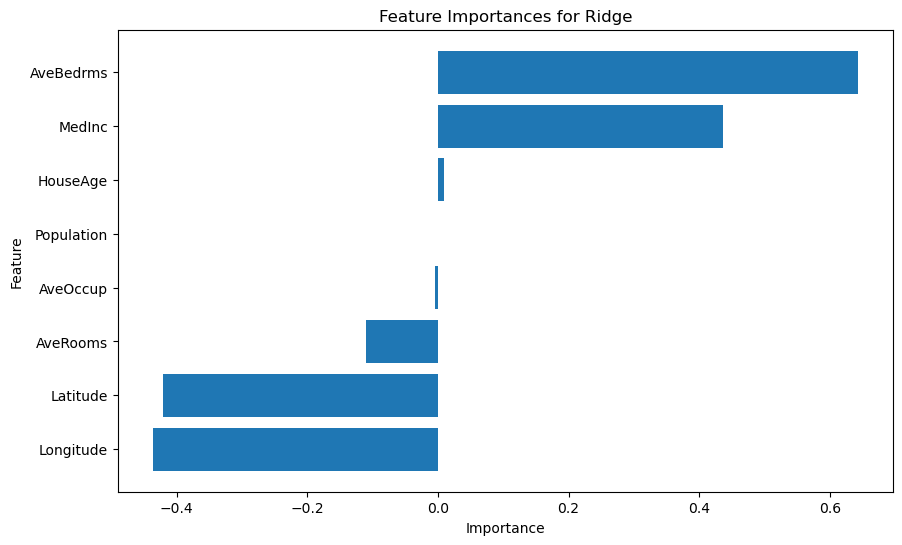

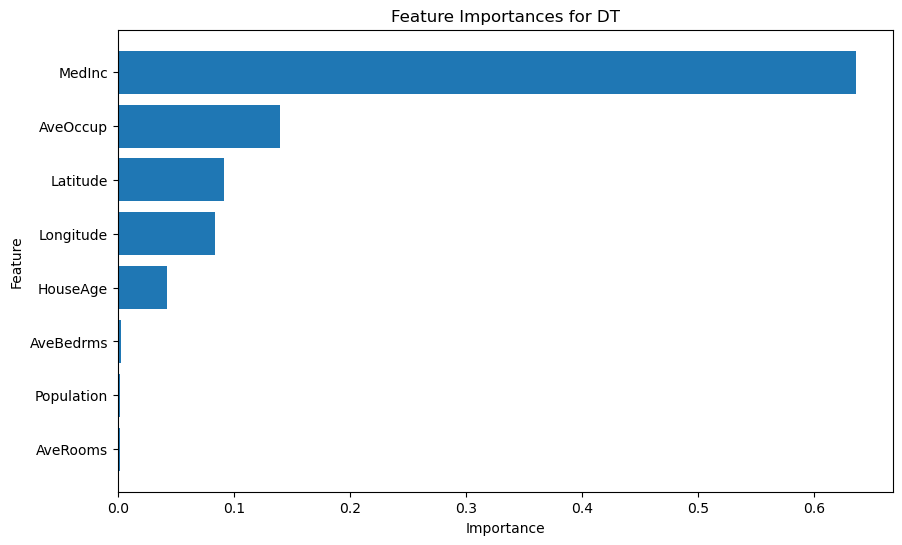

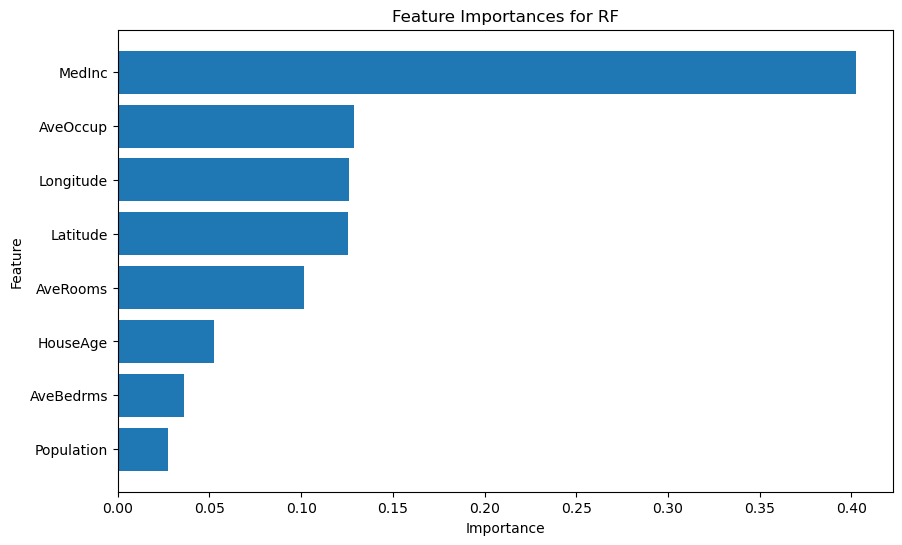

In [92]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
data = cal_housing['data']
target = cal_housing['target']
names = cal_housing['feature_names']
target_name = cal_housing['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38)

feature_names = X_train.columns

X_train = X_train.values

X_test = X_test.values

y_train = y_train.values.ravel()

y_test = y_test.values.ravel()

ridge = Ridge(alpha=0.0001)
ridge.fit(X_train, y_train)

ridge_importances = ridge.coef_

decision_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=16, min_samples_split=60)
decision_tree.fit(X_train, y_train)

decision_tree_importances = decision_tree.feature_importances_


rf_regressor = RandomForestRegressor(n_estimators=200, max_features=3 ,max_depth=15)
rf_regressor.fit(X_train, y_train)

rf_importances = rf_regressor.feature_importances_

sorted_indices = ridge_importances.argsort()[::-1]
sorted_importances = ridge_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
    
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for Ridge")
plt.gca().invert_yaxis() 
plt.show()

sorted_indices = decision_tree_importances.argsort()[::-1]
sorted_importances = decision_tree_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
    
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for DT")
plt.gca().invert_yaxis() 
plt.show()

sorted_indices = rf_importances.argsort()[::-1]
sorted_importances = rf_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
    
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
plt.yticks(range(len(sorted_importances)), sorted_feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances for RF")
plt.gca().invert_yaxis() 
plt.show()

## Problem 6

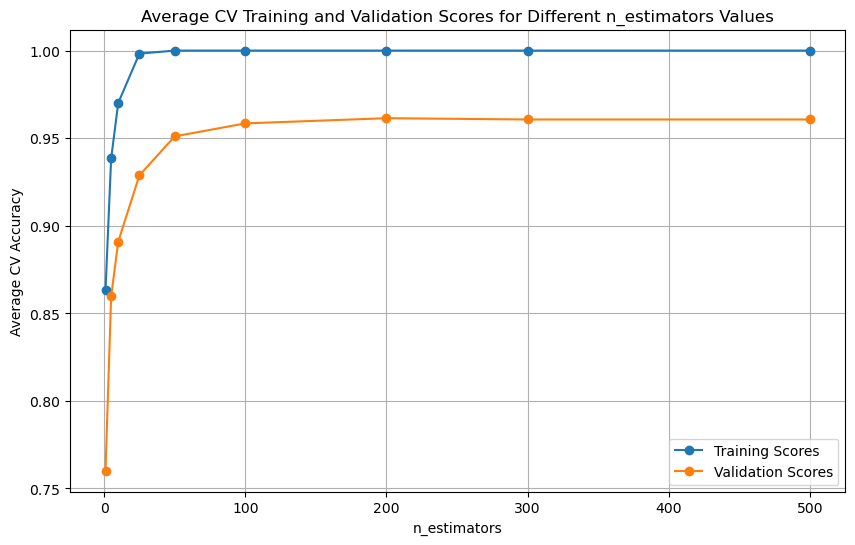

In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']
names = digits['feature_names']
target_name = digits['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha


n_estimators_values = [1, 5, 10, 25, 50, 100, 200, 300, 500]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for n_estimators in n_estimators_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store training scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        gbrt_classifier = GradientBoostingClassifier(n_estimators=n_estimators)
        gbrt_classifier.fit(X_train, y_train)
        fold_training_scores.append(gbrt_classifier.score(X_train, y_train))
        fold_validation_scores.append(gbrt_classifier.score(X_test, y_test))
    
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(n_estimators_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different n_estimators Values')
plt.legend()
plt.grid(True)
plt.show()



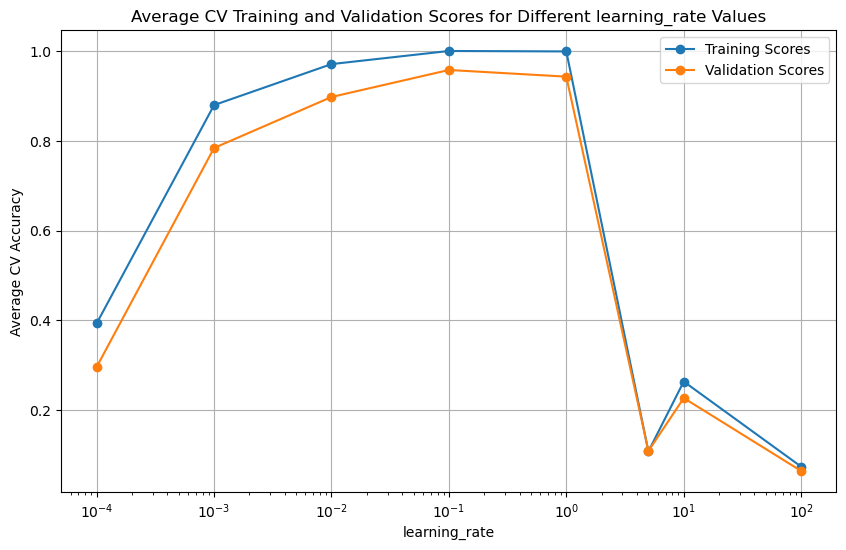

In [32]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']
names = digits['feature_names']
target_name = digits['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha


learning_rate_values = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for learning_rate in learning_rate_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store training scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        gbrt_classifier = GradientBoostingClassifier(learning_rate=learning_rate)
        gbrt_classifier.fit(X_train, y_train)
        fold_training_scores.append(gbrt_classifier.score(X_train, y_train))
        fold_validation_scores.append(gbrt_classifier.score(X_test, y_test))
    
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(learning_rate_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('learning_rate')
plt.xscale('log')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different learning_rate Values')
plt.legend()
plt.grid(True)
plt.show()



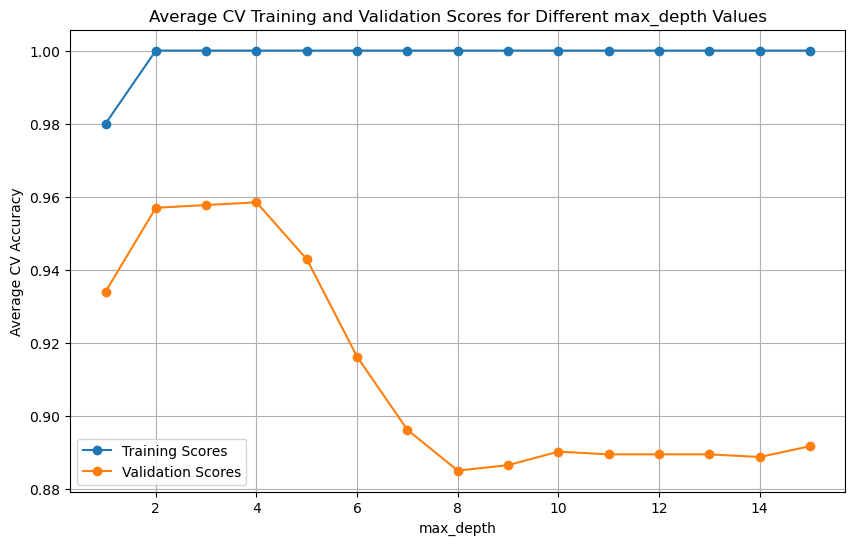

In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']
names = digits['feature_names']
target_name = digits['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X = X_train.values

y = y_train.values.ravel()

mean_validation_scores = []  # Store the mean validation scores for each alpha
mean_training_scores = [] # Store the mean training scores for each alpha

max_depth_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,None]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for max_depth in max_depth_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store training scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        gbrt_classifier = GradientBoostingClassifier(max_depth=max_depth)
        gbrt_classifier.fit(X_train, y_train)
        fold_training_scores.append(gbrt_classifier.score(X_train, y_train))
        fold_validation_scores.append(gbrt_classifier.score(X_test, y_test))
    
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(max_depth_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different max_depth Values')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']
names = digits['feature_names']
target_name = digits['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X = X_train.values

y = y_train.values.ravel()

gbc = GradientBoostingClassifier(max_depth=4)

# Define a parameter grid for GBC classifier
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.1, 1, 2],
}

# Perform 4-fold cross-validation and grid search for Gradient Boosted Regression Tree Classifier
grid_search = GridSearchCV(gbc, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X, y)

print(grid_search.best_params_)

print(f"Best n_estimators parameter for Gradient Boosted Regression Tree Classifier: {grid_search.best_params_['n_estimators']}")
print(f"Best learning_rate parameter for Gradient Boosted Regression Tree Classifier: {grid_search.best_params_['learning_rate']}")
print("Best max_depth parameter for Gradient Boosted Regression Tree Classifier: 4")
print(f"Best cross-validation accuracy for Gradient Boosted Regression Tree Classifier: {grid_search.best_score_:}")

{'learning_rate': 0.1, 'n_estimators': 200}
Best n_estimators parameter for Gradient Boosted Regression Tree Classifier: 200
Best learning_rate parameter for Gradient Boosted Regression Tree Classifier: 0.1
Best max_depth parameter for Gradient Boosted Regression Tree Classifier: 4
Best cross-validation accuracy for Gradient Boosted Regression Tree Classifier: 0.9591767344920165


In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']
names = digits['feature_names']
target_name = digits['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = X_train.values

X_test = X_test.values

y_train = y_train.values.ravel()

y_test = y_test.values.ravel()

gbc = GradientBoostingClassifier(n_estimators =200, learning_rate=0.1, max_depth=4)
gbc.fit(X_train, y_train)


print(f"Gradient Boosted Regression Tree Classifier training score: {gbc.score(X_train, y_train)}")
print("Best cross-validation accuracy for Gradient Boosted Regression Tree Classifier: 0.9592")
print(f"Gradient Boosted Regression Tree Classifier testing score: {gbc.score(X_test, y_test)}")



Gradient Boosted Regression Tree Classifier training score: 1.0
Best cross-validation accuracy for Gradient Boosted Regression Tree Classifier: 0.9592
Gradient Boosted Regression Tree Classifier testing score: 0.9577777777777777


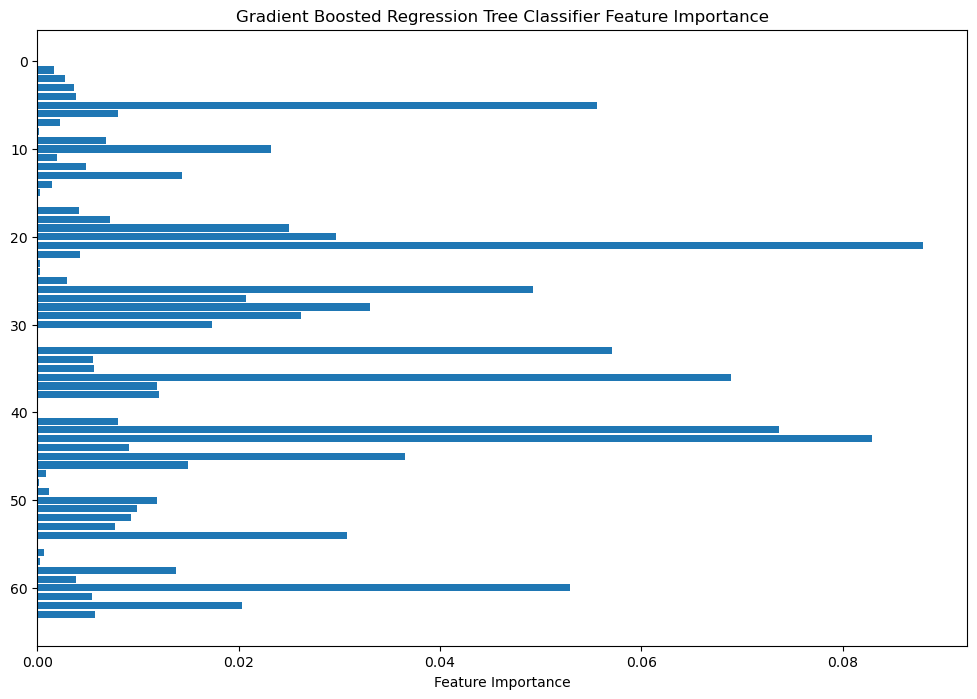

In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']
names = digits['feature_names']
target_name = digits['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = X_train.values

X_test = X_test.values

y_train = y_train.values.ravel()

y_test = y_test.values.ravel()

gbc = GradientBoostingClassifier(n_estimators =200, learning_rate=0.1, max_depth=4)
gbc.fit(X_train, y_train)

# Access feature importance
feature_importances = gbc.feature_importances_

# Plot feature importance values
plt.figure(figsize=(12, 8))
num_features = len(feature_importances)
plt.barh(range(num_features), feature_importances, align='center')  # Fix this line
plt.xlabel('Feature Importance')
plt.title('Gradient Boosted Regression Tree Classifier Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


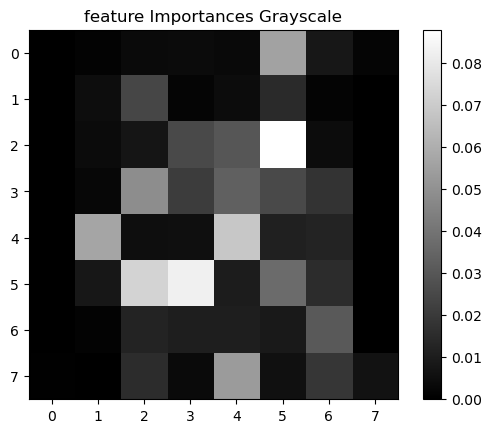

In [27]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']
names = digits['feature_names']
target_name = digits['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = X_train.values

X_test = X_test.values

y_train = y_train.values.ravel()

y_test = y_test.values.ravel()

gbc = GradientBoostingClassifier(n_estimators =200, learning_rate=0.1, max_depth=4)
gbc.fit(X_train, y_train)

# Access feature importance
feature_importances = gbc.feature_importances_

#plot feature imporances in 8 x 8 gray scale
plt.imshow(feature_importances.reshape(8,8), cmap="gray", interpolation='nearest')
plt.title('feature Importances Grayscale')
plt.colorbar()
plt.show()

In [33]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']
names = digits['feature_names']
target_names = digits['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(X_test.shape)

gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

# Find misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

k = 3
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X_train)
distances, indices = nn.kneighbors(X_test[misclassified_indices])

columns = ["Misclassified Test idx", "True Class", "Pred Class"]

df = pd.DataFrame(columns=columns)

df["Misclassified Test idx"] = misclassified_indices
df["True Class"] = y_test[misclassified_indices]
df["Pred Class"] = y_pred[misclassified_indices]

for i in range(k):
    df["Neighbor#{}_idx".format(i + 1)] = indices[:, i]
    df["Neighbor#{}_True Class".format(i + 1)] = y_train[indices[:, i]]
    df["Neighbor#{}_Distance".format(i + 1)] = np.around(distances[:, i], decimals=2)

display(df)


(450, 64)


,Misclassified Test idx,True Class,Pred Class,Neighbor#1_idx,Neighbor#1_True Class,Neighbor#1_Distance,Neighbor#2_idx,Neighbor#2_True Class,Neighbor#2_Distance,Neighbor#3_idx,Neighbor#3_True Class,Neighbor#3_Distance
0,47,6,8,742,6,20.54,105,6,21.14,725,6,25.24
1,56,5,9,157,5,25.51,350,5,26.66,498,5,26.70
2,90,9,0,802,9,22.36,1052,9,23.85,918,9,25.53
3,117,2,0,1127,2,26.68,1051,2,27.73,325,2,29.82
4,118,6,2,1168,6,27.77,849,6,28.64,930,6,29.92
5,124,8,1,1192,8,23.45,345,8,25.28,765,1,28.88
6,130,9,5,215,3,25.26,1275,9,26.13,135,9,26.15
7,170,6,8,1045,6,17.46,468,6,19.36,930,6,19.42
8,181,5,9,1145,9,22.20,1084,9,22.65,1076,9,24.06
9,211,9,3,135,9,19.10,639,9,24.90,1235,9,25.06


(450, 64)


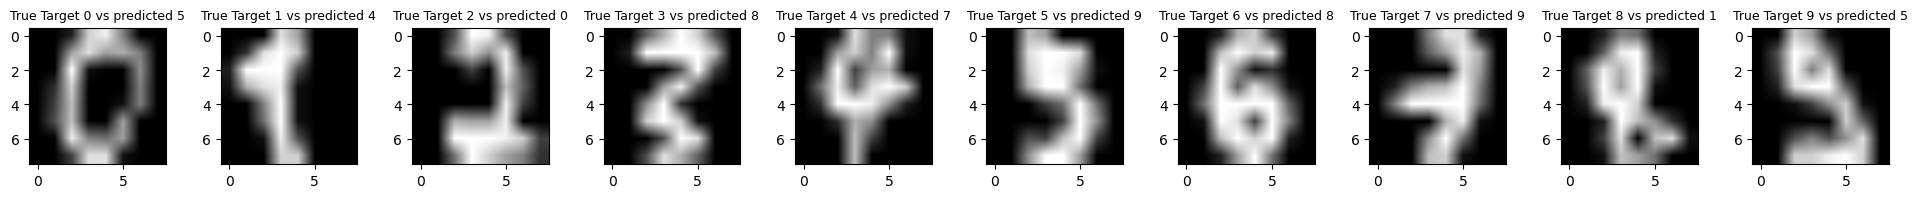

In [39]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']
names = digits['feature_names']
target_names = digits['target_names']
X = pd.DataFrame(data, columns=names)
y = pd.DataFrame(target, columns=['Target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(X_test.shape)

gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

# Find misclassified samples
misclassified_indices = np.where(y_pred != y_test)[0]

indicesToPlot = [307, 331, 117, 378, 315, 181, 47, 425, 124, 130]

fig, axs = plt.subplots(1, 10, figsize=(24,16))
for i in range(10):
    axs[i].imshow(X_test[indicesToPlot[i]].reshape(8,8), cmap='gray', interpolation='bilinear')
    axs[i].set_title('True Target {} vs predicted {}'.format(y_test[indicesToPlot[i]], y_pred[indicesToPlot[i]]), fontsize=9)

fig.subplots_adjust(wspace=0.4)
plt.show()


        
